In [27]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, Bidirectional
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv("input.csv")

texts = data['text'].tolist()
classes = data['class'].tolist()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

tokenized_texts = [word_tokenize(text.lower()) for text in texts]
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

preprocessed_texts = []
for tokens in tokenized_texts:
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token not in punctuation]
    preprocessed_texts.append(filtered_tokens)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(preprocessed_texts)
max_sequence_length = 500
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)
num_classes = len(set(classes))
one_hot_classes = to_categorical(encoded_classes, num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_classes, test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=7))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

model2 = Sequential()
model2.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model2.add(LSTM(200))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128)

cnn_lstm_predictions = model.predict(X_test)
lstm_rnn_predictions = model2.predict(X_test)

combined_predictions = []
for i in range(len(cnn_lstm_predictions)):
    combined_predictions.append(np.argmax(cnn_lstm_predictions[i] + lstm_rnn_predictions[i]))

combined_accuracy = accuracy_score(np.argmax(y_test, axis=1), combined_predictions)
print("Combined model accuracy:", combined_accuracy)

print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), combined_predictions,target_names=label_encoder.classes_))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/5
74/74 [==============================] - 23s 232ms/step - loss: 1.4344 - accuracy: 0.4552 - val_loss: 0.8149 - val_accuracy: 0.6931
Epoch 2/5
74/74 [==============================] - 16s 214ms/step - loss: 0.6059 - accuracy: 0.7708 - val_loss: 0.6396 - val_accuracy: 0.7707
Epoch 3/5
74/74 [==============================] - 14s 191ms/step - loss: 0.2936 - accuracy: 0.8920 - val_loss: 0.5414 - val_accuracy: 0.8154
Epoch 4/5
74/74 [==============================] - 16s 210ms/step - loss: 0.1242 - accuracy: 0.9587 - val_loss: 0.5978 - val_accuracy: 0.8150
Epoch 5/5
74/74 [==============================] - 13s 171ms/step - loss: 0.0599 - accuracy: 0.9824 - val_loss: 0.6262 - val_accuracy: 0.8223
Epoch 1/5
74/74 [==============================] - 20s 240ms/step - loss: 2.0292 - accuracy: 0.2832 - val_loss: 2.7854 - val_accuracy: 0.1795
Epoch 2/5
74/74 [==============================] - 16s 217ms/step - loss: 1.3700 - accuracy: 0.5048 - val_loss: 1.0843 - val_accuracy: 0.6347
Epoch 

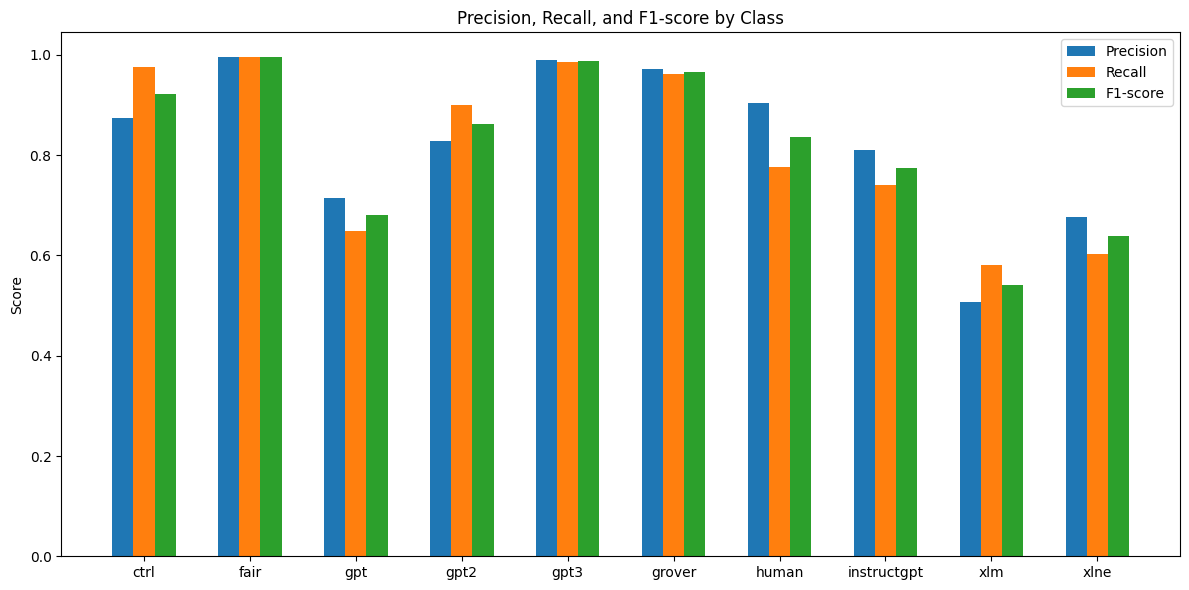

In [29]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(np.argmax(y_test, axis=1), combined_predictions)

# Get the class labels
class_labels = label_encoder.classes_

# Plot the results as a bar plot
x = np.arange(len(class_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-score by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

fig.tight_layout()

plt.show()


In [14]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Flatten, Bidirectional
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# Step 1: Load the data from the CSV file

data = pd.read_csv("input.csv")

texts = data['text'].tolist()
classes = data['class'].tolist()

# Step 2: Convert the text data into numerical representations
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

tokenized_texts = []
for text in texts:
    tokens = [lemmatizer.lemmatize(token.lower()) for token in word_tokenize(text) if
              token.lower() not in stop_words and token.lower() not in string.punctuation]
    tokenized_texts.append(tokens)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(tokenized_texts)
max_sequence_length = 500
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Step 3: Encode the class labels
label_encoder = LabelEncoder()
encoded_classes = label_encoder.fit_transform(classes)
num_classes = len(label_encoder.classes_)
one_hot_classes = to_categorical(encoded_classes, num_classes=num_classes)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_classes, test_size=0.2, random_state=42)

# Step 5: Define and train the CRNN model
model = Sequential()
model.add(Embedding(len(word_index) + 1, 100, input_length=max_sequence_length))
model.add(Conv1D(256, 8, activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=256)

# Step 6: Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)
y_test_encoded = y_test.argmax(axis=1)

# Step 7: Decode the class labels and generate the classification report
decoded_classes = label_encoder.inverse_transform(range(num_classes))
report = classification_report(y_test_encoded, y_pred, target_names=decoded_classes)
print(report)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/5
37/37 [==============================] - 15s 317ms/step - loss: 1.8893 - accuracy: 0.3239 - val_loss: 1.0933 - val_accuracy: 0.5904
Epoch 2/5
37/37 [==============================] - 10s 269ms/step - loss: 0.6412 - accuracy: 0.7732 - val_loss: 0.5880 - val_accuracy: 0.7877
Epoch 3/5
37/37 [==============================] - 10s 263ms/step - loss: 0.2253 - accuracy: 0.9284 - val_loss: 0.5576 - val_accuracy: 0.8248
Epoch 4/5
37/37 [==============================] - 9s 238ms/step - loss: 0.0696 - accuracy: 0.9827 - val_loss: 0.6190 - val_accuracy: 0.8248
Epoch 5/5
74/74 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

        ctrl       0.93      0.94      0.94       214
        fair       1.00      1.00      1.00       217
         gpt       0.78      0.57      0.66       213
        gpt2       0.74      0.95      0.83       431
        gpt3       0.98      0.98      0.98       215
      grover       0.96      0.94      0.95  

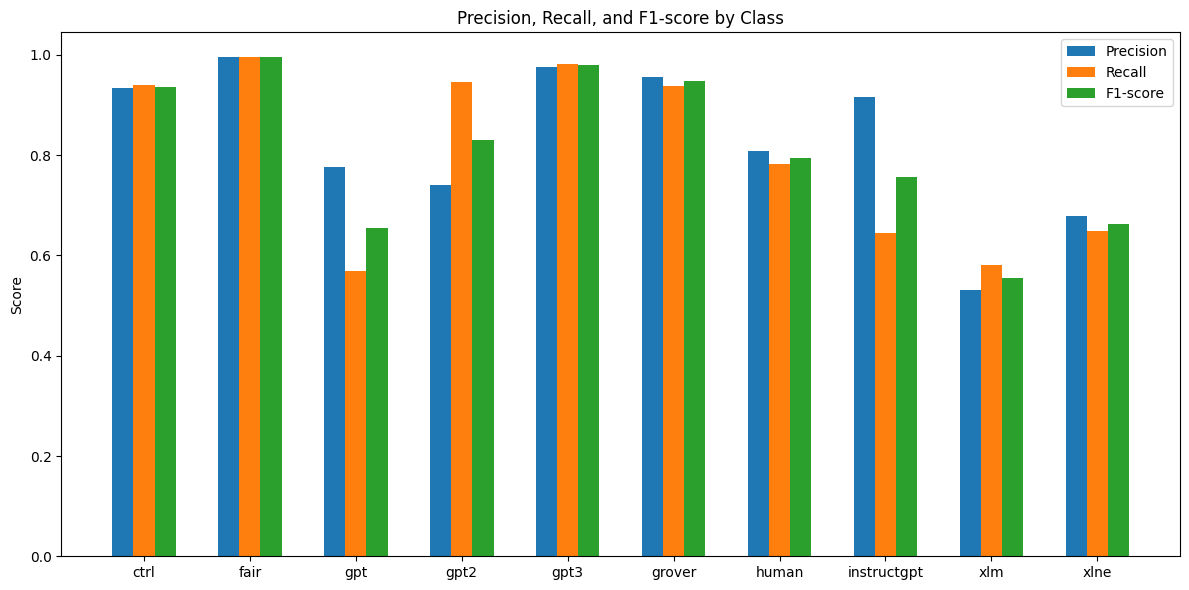

In [16]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_encoded, y_pred)

# Get the class labels
class_labels = label_encoder.classes_

# Plot the results as a bar plot
x = np.arange(len(class_labels))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-score by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

fig.tight_layout()

plt.show()


In [24]:
import pandas as pd
df=pd.read_csv("input.csv")